# 3.6.5 - Predicting Cancer

The goal of this project is to create a model that predicts whether cancer is present in a cell sample. We also want to know what traits are indicitave of cancer. I will compare the performance of K Nearest Neighbors Classifier, Support Vector Classifier, and Logistic Regression.  

**Features**

   1. Sample code number            
   2. Clump Thickness               
   3. Uniformity of Cell Size       
   4. Uniformity of Cell Shape      
   5. Marginal Adhesion             
   6. Single Epithelial Cell Size   
   7. Bare Nuclei                   
   8. Bland Chromatin               
   9. Normal Nucleoli               
   10. Mitoses                       
   11. Class     
   
   **Class distribution:**
 
   Benign: 458 (65.5%)  
   Malignant: 241 (34.5%)
   
Data from UCI Machine Learning Repository:  
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = r'..\..\..\..\Data Science Data\Unit 3\Cancer.csv'
wf = r'C:\Users\206547663\Documents\Python\DS\Data\Cancer.csv'

col_names = ['id',
             'clump_thickness',
             'uniform_cell_size',
             'uniform_cell_shape',
             'adhesion',
             'single_cell_size',
             'bare_nuclei',
             'chromatin',
             'normal_nucleoli',
             'mitoses',
             'class']

df = pd.read_csv(f,sep=',',header=None,usecols=range(1,11,1),names=col_names,na_values='?')

In [2]:
df.dropna(inplace=True)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

replace_me = {'class':{4:'cancerous',2:'benign'}}
df.replace(to_replace=replace_me,inplace=True)

## Modeling 

We'll start by running each model on the imported data set. There is a class imbalance with ~65% of the samples benign and ~35% cancerous. The models perform reasonably well when unbalanced with SVC being the better model due to it having 0 false negatives (Actually Cancerous, Predicted Benign).   

All the models performed better after balancing the data set with SVC again have a 0 false negative rate.

In [4]:
from sklearn.model_selection import train_test_split

X = df.loc[:,df.columns != 'class']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

knc = KNeighborsClassifier(n_neighbors=5)
svc = SVC(C=1)
logr = LogisticRegression(penalty='l2',C=1)

In [6]:
models = [knc,svc,logr]

for model in models:
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print('-'*20)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[84  3]
 [ 1 49]]
--------------------
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[80  7]
 [ 0 50]]
--------------------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[83  4]
 [ 4 46]]
--------------------


In [7]:
# Normalize the dataset

df_ss = df[df['class'] == 'cancerous']
df_ss2 = df[df['class'] == 'benign'].sample(n=df_ss.shape[0])
df_ss = df_ss.append(df_ss2)

for value in df_ss['class'].unique():
    print('Number of {} cell type:'.format(value))
    print(df_ss[df_ss['class'] == value]['class'].count())

Number of cancerous cell type:
239
Number of benign cell type:
239


In [8]:
X = df_ss.loc[:,df_ss.columns != 'class']
y = df_ss['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
# Look at all the models on a balanced dataset

for model in models:
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print('-'*20)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[41  1]
 [ 1 53]]
--------------------
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[39  3]
 [ 0 54]]
--------------------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[42  0]
 [ 3 51]]
--------------------


## Feature Importance

We can use the coefficients of the Logistic Regression to get an idea of what features are the most indicative of cancer. We can cross reference this with a visualization of the distribution of the different classes with a violinplot.  

Bare_Nuclei is the best feature to use.

In [10]:
col_names = {'Features': X.columns}

feature_importance = pd.DataFrame(col_names)
feature_importance['Coef'] = logr.coef_[0]
feature_importance.sort_values(by='Coef',ascending=False)

,Features,Coef
5,bare_nuclei,0.374356
3,adhesion,0.232826
2,uniform_cell_shape,0.206731
8,mitoses,0.179950
0,clump_thickness,0.170782
1,uniform_cell_size,0.165624
7,normal_nucleoli,0.114705
6,chromatin,0.080626
4,single_cell_size,-0.005469


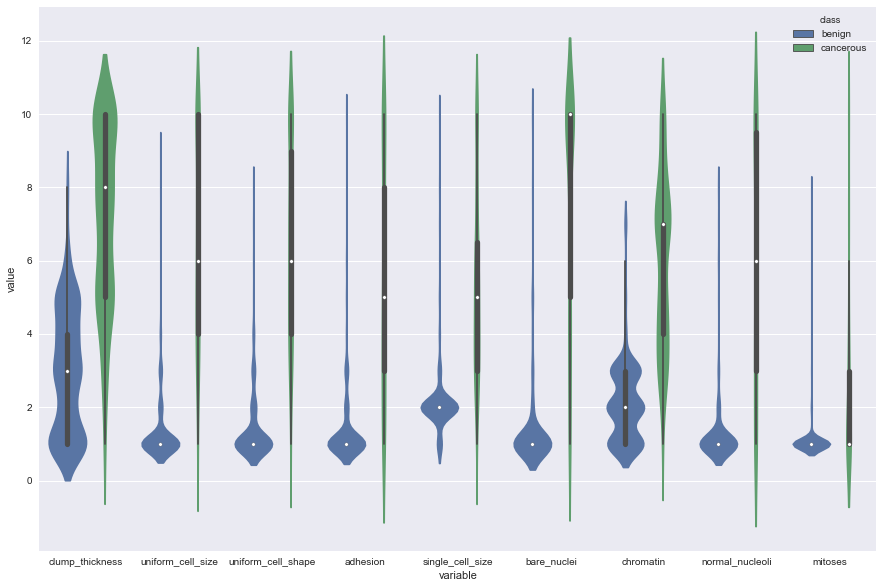

In [13]:
plt.figure(figsize=(15,10))

df_long = df.melt('class')
sns.violinplot(x='variable',y='value',data=df_long,hue='class',width=0.8)
plt.show()